In [156]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

In [138]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,Adagrad
import matplotlib.pyplot  as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
plt.style.use(['seaborn-white'])

In [195]:
df = pd.read_csv('data/crime_in_Seoul.csv',encoding='euc-kr')
df.columns

Index(['관서명', '살인 발생', '살인 검거', '강도 발생', '강도 검거', '강간 발생', '강간 검거', '절도 발생',
       '절도 검거', '폭력 발생', '폭력 검거'],
      dtype='object')

In [143]:
df.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794


1. 살인발생이 가장높은 관서명, 살인발생,살인검거를 
출력하시요

In [144]:
df[df['살인 발생'].values == [df['살인 발생'].max()]].iloc[:,:3]

,관서명,살인 발생,살인 검거
9,영등포서,14,12


2. 관서별 절도발생,절도검거에 대한 바차트를 그리시요

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     object
 8   절도 검거   31 non-null     object
 9   폭력 발생   31 non-null     object
 10  폭력 검거   31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [197]:
a = df['절도 검거'].values
b = df['절도 발생'].values
aa = df['폭력 검거'].values
bb = df['폭력 발생'].values
a = [i.replace(',', '') for i in a]
b = [i.replace(',', '') for i in b]
a = np.array([int(i) for i in a])
b = np.array([int(i) for i in b])




aa = [i.replace(',', '') for i in aa]
bb = [i.replace(',', '') for i in bb]
aa = np.array([int(i) for i in aa])
bb = np.array([int(i) for i in bb])
df['절도 발생'] = b
df['절도 검거'] = a
df['폭력 발생'] = bb
df['폭력 검거'] = aa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int32 
 8   절도 검거   31 non-null     int32 
 9   폭력 발생   31 non-null     int32 
 10  폭력 검거   31 non-null     int32 
dtypes: int32(4), int64(6), object(1)
memory usage: 2.3+ KB


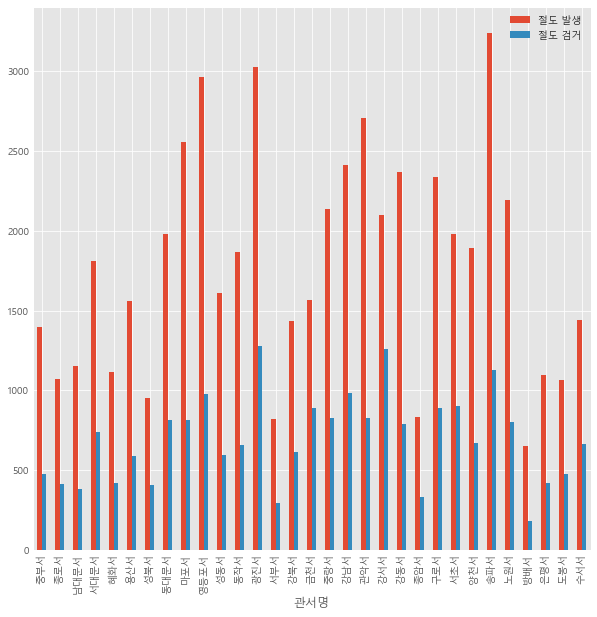

In [247]:

df[['관서명','절도 발생','절도 검거']].plot.bar(figsize=(10,10) ,x='관서명',y=['절도 발생','절도 검거'])
plt.show()

3. 절도검거율 컬럼을 추가 하시요

In [199]:
df['절도검거율'] = a/b

In [200]:
df.head(3)

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,절도검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,0.341935
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,0.385981
2,남대문서,1,0,6,4,65,46,1153,382,869,794,0.331310


4. 폭력발생 top5를 구하시요( 관서명, 폭력발생, 폭력검거)

In [207]:
df[['관서명','폭력 발생','폭력 검거']].sort_values(by=df[['관서명','폭력 발생','폭력 검거']].columns[2],ascending=False)[:5]

,관서명,폭력 발생,폭력 검거
9,영등포서,3572,2961
25,송파서,3295,2786
19,강서서,3207,2718
18,관악서,3298,2642
8,마포서,2983,2519


5. 상관관계 heatmap을 그리시요

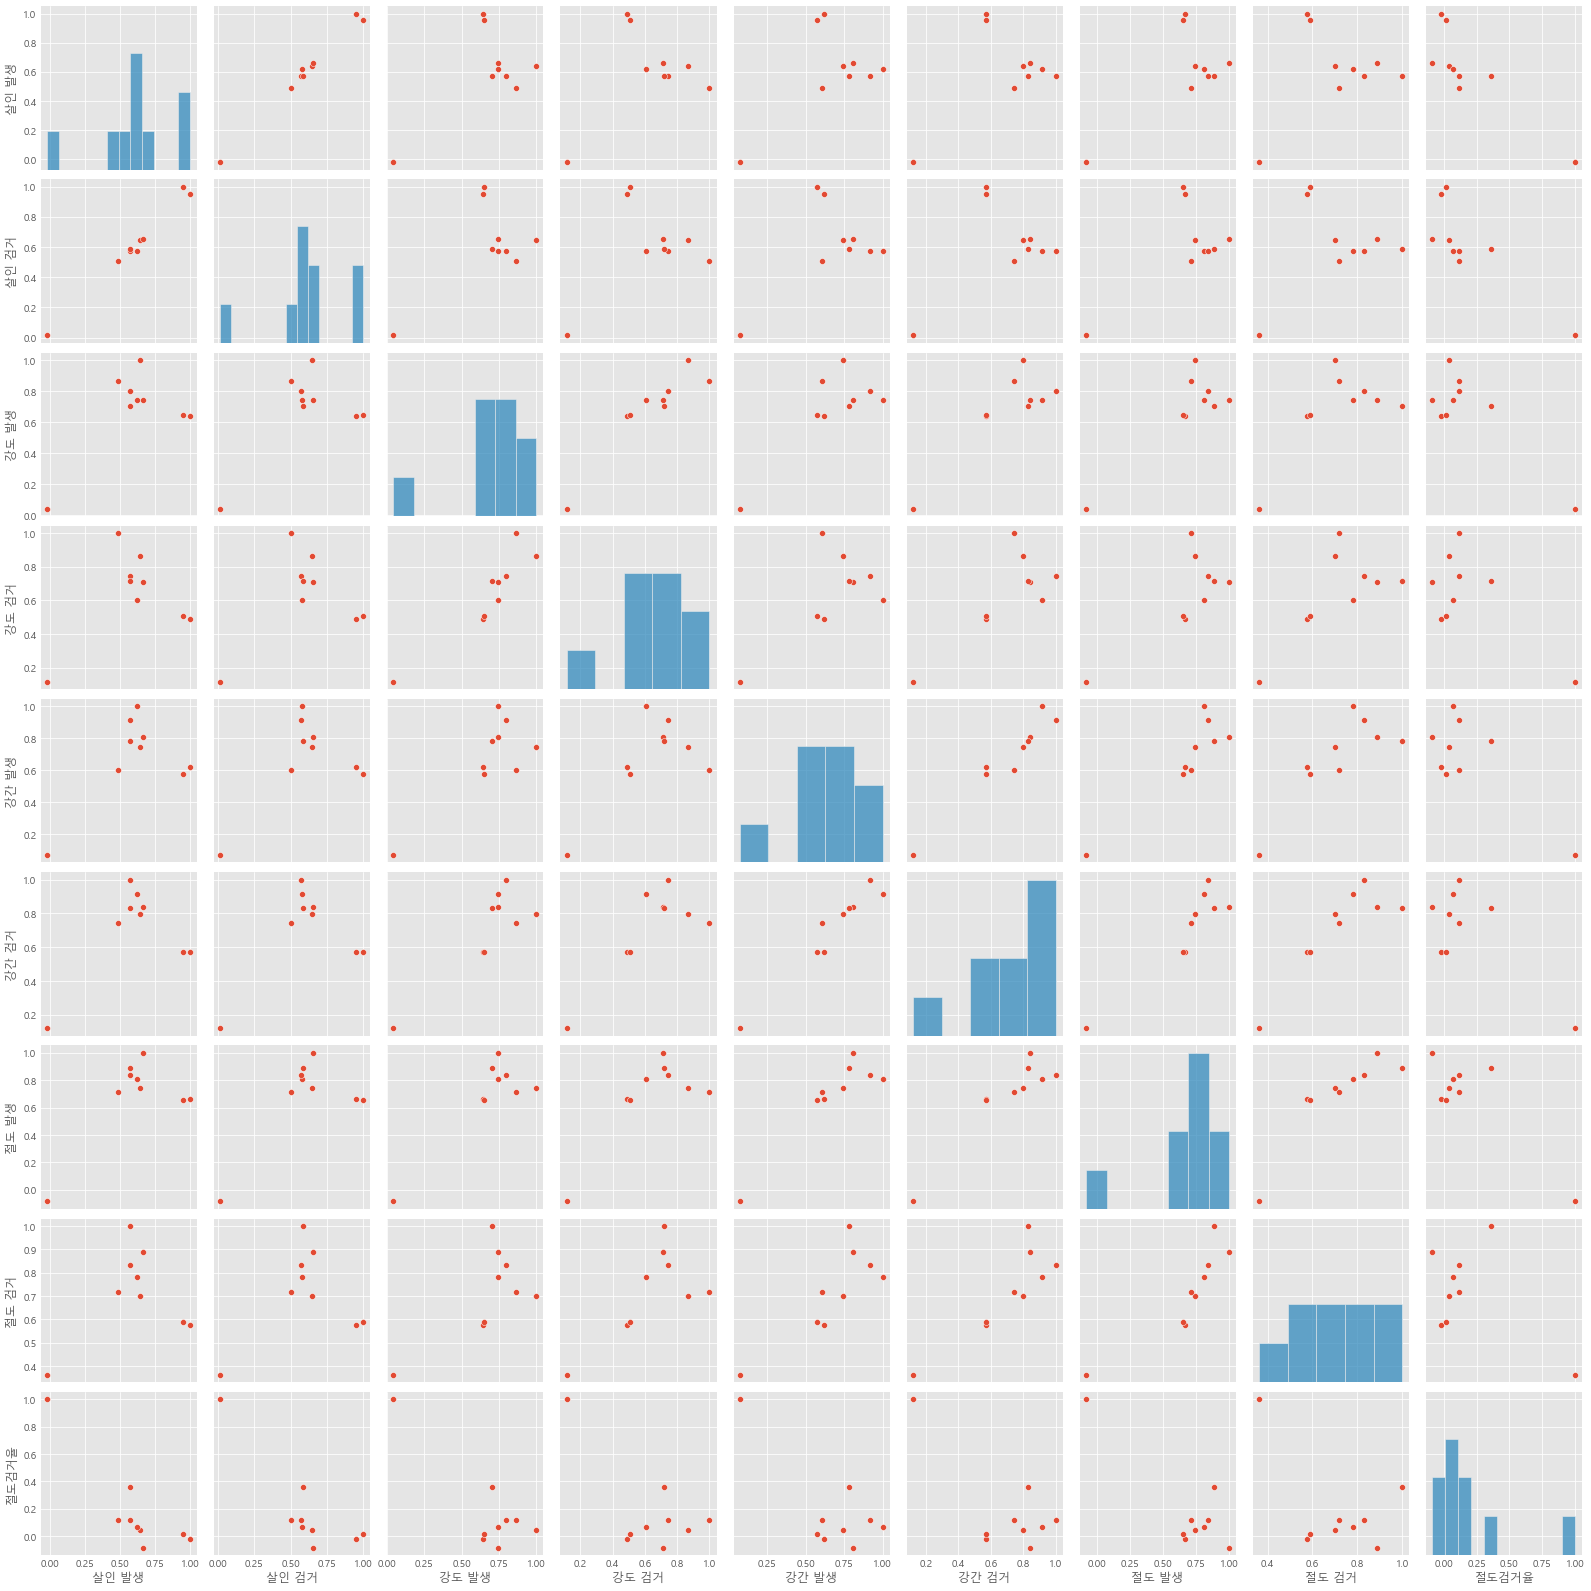

In [187]:
sns.pairplot(df.corr())

<AxesSubplot:>

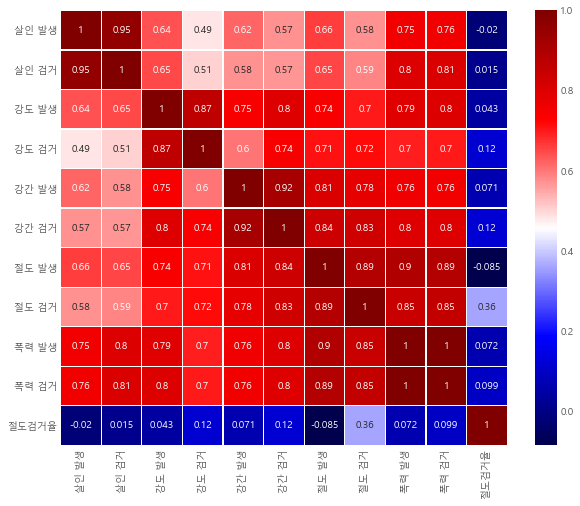

In [217]:
plt.figure(figsize=(10,8))
sns.heatmap((df.corr()) ,annot=True,linewidths=0.2,cmap='seismic')

6. 살인발생과 폭력발생의 상관관계를 확인하고  
살인 발생이 5건인경우 폭력발생수를 예측하시요  
( 텐서버전, 케라스버전)

## 텐서 버전

In [208]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [211]:
# 상관 관계 확인
df[['살인 발생','폭력 발생']].corr()

,살인 발생,폭력 발생
살인 발생,1.000000,0.754575
폭력 발생,0.754575,1.000000


x = 살인발생과 폭력발생
y = 폭력발생수

In [221]:
x_data = df['살인 발생'].values
y_data = df['폭력 발생'].values

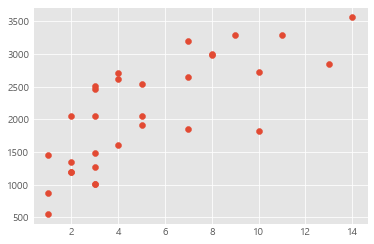

In [222]:
plt.scatter(x_data, y_data)
plt.show()

In [224]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)
w = tf.Variable( tf.random.uniform([1]) ) #임의의 값 부여
b = tf.Variable( tf.random.uniform([1]) )

In [225]:
def compute_cost():
    hx = w*x + b
    cost = tf.reduce_mean((hx-y)**2)
    return cost

In [226]:
optimizer = Adam(learning_rate = 0.01)
electric_cost = []
for i in range(2000):
    optimizer.minimize(compute_cost, var_list=[w, b]) 
    c = compute_cost().numpy()
    electric_cost.append(c)
    print(i, 'cost = ', c)

0 cost =  5074921.0
1 cost =  5074614.0
2 cost =  5074308.0
3 cost =  5074002.0
4 cost =  5073695.5
5 cost =  5073389.0
6 cost =  5073083.0
7 cost =  5072776.5
8 cost =  5072470.0
9 cost =  5072163.5
10 cost =  5071857.0
11 cost =  5071551.0
12 cost =  5071244.5
13 cost =  5070939.0
14 cost =  5070632.5
15 cost =  5070326.0
16 cost =  5070019.5
17 cost =  5069713.5
18 cost =  5069407.5
19 cost =  5069101.0
20 cost =  5068795.0
21 cost =  5068489.0
22 cost =  5068182.0
23 cost =  5067876.5
24 cost =  5067570.0
25 cost =  5067264.0
26 cost =  5066958.0
27 cost =  5066652.0
28 cost =  5066346.0
29 cost =  5066039.5
30 cost =  5065733.5
31 cost =  5065427.5
32 cost =  5065121.5
33 cost =  5064815.5
34 cost =  5064509.5
35 cost =  5064204.0
36 cost =  5063898.0
37 cost =  5063591.5
38 cost =  5063285.5
39 cost =  5062980.0
40 cost =  5062674.5
41 cost =  5062368.0
42 cost =  5062062.5
43 cost =  5061756.5
44 cost =  5061451.0
45 cost =  5061145.0
46 cost =  5060839.0
47 cost =  5060532.5
48

400 cost =  4953538.0
401 cost =  4953237.0
402 cost =  4952937.5
403 cost =  4952636.5
404 cost =  4952336.0
405 cost =  4952035.5
406 cost =  4951735.0
407 cost =  4951435.0
408 cost =  4951134.5
409 cost =  4950834.5
410 cost =  4950533.5
411 cost =  4950234.0
412 cost =  4949934.0
413 cost =  4949633.0
414 cost =  4949333.0
415 cost =  4949032.5
416 cost =  4948732.0
417 cost =  4948432.0
418 cost =  4948131.5
419 cost =  4947831.0
420 cost =  4947531.5
421 cost =  4947231.0
422 cost =  4946931.0
423 cost =  4946630.5
424 cost =  4946331.0
425 cost =  4946031.0
426 cost =  4945730.5
427 cost =  4945430.5
428 cost =  4945130.5
429 cost =  4944830.5
430 cost =  4944530.5
431 cost =  4944230.5
432 cost =  4943930.5
433 cost =  4943630.5
434 cost =  4943330.5
435 cost =  4943030.5
436 cost =  4942730.5
437 cost =  4942430.5
438 cost =  4942130.5
439 cost =  4941831.0
440 cost =  4941531.0
441 cost =  4941231.0
442 cost =  4940931.0
443 cost =  4940631.0
444 cost =  4940331.5
445 cost =

806 cost =  4832736.5
807 cost =  4832442.0
808 cost =  4832147.0
809 cost =  4831853.0
810 cost =  4831558.0
811 cost =  4831263.0
812 cost =  4830969.0
813 cost =  4830674.0
814 cost =  4830380.0
815 cost =  4830085.0
816 cost =  4829790.5
817 cost =  4829496.5
818 cost =  4829201.5
819 cost =  4828907.0
820 cost =  4828612.5
821 cost =  4828318.0
822 cost =  4828023.0
823 cost =  4827729.0
824 cost =  4827435.0
825 cost =  4827140.5
826 cost =  4826846.0
827 cost =  4826551.5
828 cost =  4826257.0
829 cost =  4825963.0
830 cost =  4825668.5
831 cost =  4825374.0
832 cost =  4825079.5
833 cost =  4824786.0
834 cost =  4824491.5
835 cost =  4824196.5
836 cost =  4823903.0
837 cost =  4823609.0
838 cost =  4823314.0
839 cost =  4823020.5
840 cost =  4822726.0
841 cost =  4822432.0
842 cost =  4822137.5
843 cost =  4821843.0
844 cost =  4821549.5
845 cost =  4821255.0
846 cost =  4820961.0
847 cost =  4820667.0
848 cost =  4820373.0
849 cost =  4820079.0
850 cost =  4819784.5
851 cost =

1227 cost =  4709892.0
1228 cost =  4709603.5
1229 cost =  4709314.0
1230 cost =  4709025.5
1231 cost =  4708736.0
1232 cost =  4708447.5
1233 cost =  4708158.5
1234 cost =  4707870.0
1235 cost =  4707581.5
1236 cost =  4707292.0
1237 cost =  4707003.5
1238 cost =  4706714.5
1239 cost =  4706426.0
1240 cost =  4706137.0
1241 cost =  4705848.5
1242 cost =  4705559.5
1243 cost =  4705270.5
1244 cost =  4704981.0
1245 cost =  4704693.0
1246 cost =  4704404.0
1247 cost =  4704115.0
1248 cost =  4703826.5
1249 cost =  4703538.5
1250 cost =  4703250.0
1251 cost =  4702960.5
1252 cost =  4702672.0
1253 cost =  4702383.5
1254 cost =  4702094.5
1255 cost =  4701806.0
1256 cost =  4701517.5
1257 cost =  4701229.0
1258 cost =  4700940.5
1259 cost =  4700651.5
1260 cost =  4700363.5
1261 cost =  4700075.0
1262 cost =  4699786.5
1263 cost =  4699498.0
1264 cost =  4699209.5
1265 cost =  4698921.5
1266 cost =  4698633.0
1267 cost =  4698343.5
1268 cost =  4698055.5
1269 cost =  4697767.0
1270 cost =

1598 cost =  4603578.0
1599 cost =  4603294.0
1600 cost =  4603009.5
1601 cost =  4602725.0
1602 cost =  4602441.5
1603 cost =  4602157.0
1604 cost =  4601873.0
1605 cost =  4601589.0
1606 cost =  4601305.5
1607 cost =  4601021.0
1608 cost =  4600737.0
1609 cost =  4600452.5
1610 cost =  4600169.0
1611 cost =  4599885.0
1612 cost =  4599600.5
1613 cost =  4599316.5
1614 cost =  4599033.0
1615 cost =  4598749.0
1616 cost =  4598464.5
1617 cost =  4598180.5
1618 cost =  4597896.5
1619 cost =  4597613.0
1620 cost =  4597329.0
1621 cost =  4597045.0
1622 cost =  4596761.0
1623 cost =  4596477.5
1624 cost =  4596193.5
1625 cost =  4595910.0
1626 cost =  4595625.5
1627 cost =  4595342.0
1628 cost =  4595058.0
1629 cost =  4594774.0
1630 cost =  4594490.5
1631 cost =  4594207.0
1632 cost =  4593922.5
1633 cost =  4593639.5
1634 cost =  4593355.5
1635 cost =  4593072.5
1636 cost =  4592787.5
1637 cost =  4592504.5
1638 cost =  4592220.5
1639 cost =  4591937.0
1640 cost =  4591653.0
1641 cost =

1972 cost =  4498161.0
1973 cost =  4497882.0
1974 cost =  4497601.5
1975 cost =  4497322.5
1976 cost =  4497042.5
1977 cost =  4496763.5
1978 cost =  4496484.0
1979 cost =  4496204.5
1980 cost =  4495925.0
1981 cost =  4495645.5
1982 cost =  4495365.5
1983 cost =  4495086.5
1984 cost =  4494807.0
1985 cost =  4494528.0
1986 cost =  4494248.5
1987 cost =  4493969.0
1988 cost =  4493690.0
1989 cost =  4493410.0
1990 cost =  4493131.0
1991 cost =  4492851.5
1992 cost =  4492572.5
1993 cost =  4492293.0
1994 cost =  4492013.5
1995 cost =  4491734.0
1996 cost =  4491455.0
1997 cost =  4491175.5
1998 cost =  4490896.5
1999 cost =  4490617.5


In [227]:
def hxFn(x_data):
    # xd = tf.constant( xdata)
    # hx = w*xd + b
    hx = w*x_data + b
    return hx.numpy()

In [236]:
# 살인 발생이 5건인경우 폭력발생수를 예측
hxFn([5])

array([121.137115], dtype=float32)

## 케라스 버전

In [238]:
dense = Dense(units=1, input_dim=1)
model = Sequential([dense])
model.compile(loss='mse', optimizer = Adam(learning_rate=0.01))
h = model.fit(x_data, y_data, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 0s 172ms/step - loss: 5065061.5000
Epoch 2/1000
1/1 [==============================] - 0s 997us/step - loss: 5064755.0000
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 5064449.0000
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 5064143.5000
Epoch 5/1000
1/1 [==============================] - 0s 997us/step - loss: 5063838.0000
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 5063531.5000
Epoch 7/1000
1/1 [==============================] - 0s 997us/step - loss: 5063225.5000
Epoch 8/1000
1/1 [==============================] - 0s 998us/step - loss: 5062919.0000
Epoch 9/1000
1/1 [==============================] - 0s 997us/step - loss: 5062613.0000
Epoch 10/1000
1/1 [==============================] - 0s 996us/step - loss: 5062307.0000
Epoch 11/1000
1/1 [==============================] - 0s 997us/step - loss: 5062001.5000
Epoch 12/1000
1/1 [============================

Epoch 95/1000
1/1 [==============================] - 0s 998us/step - loss: 5036351.5000
Epoch 96/1000
1/1 [==============================] - 0s 2ms/step - loss: 5036046.5000
Epoch 97/1000
1/1 [==============================] - 0s 2ms/step - loss: 5035742.0000
Epoch 98/1000
1/1 [==============================] - 0s 2ms/step - loss: 5035437.0000
Epoch 99/1000
1/1 [==============================] - 0s 2ms/step - loss: 5035133.0000
Epoch 100/1000
1/1 [==============================] - 0s 2ms/step - loss: 5034828.0000
Epoch 101/1000
1/1 [==============================] - 0s 997us/step - loss: 5034523.5000
Epoch 102/1000
1/1 [==============================] - 0s 997us/step - loss: 5034218.5000
Epoch 103/1000
1/1 [==============================] - 0s 2ms/step - loss: 5033914.0000
Epoch 104/1000
1/1 [==============================] - 0s 2ms/step - loss: 5033609.5000
Epoch 105/1000
1/1 [==============================] - 0s 997us/step - loss: 5033305.0000
Epoch 106/1000
1/1 [====================

1/1 [==============================] - 0s 996us/step - loss: 5008381.0000
Epoch 188/1000
1/1 [==============================] - 0s 997us/step - loss: 5008078.0000
Epoch 189/1000
1/1 [==============================] - 0s 997us/step - loss: 5007775.0000
Epoch 190/1000
1/1 [==============================] - 0s 2ms/step - loss: 5007471.5000
Epoch 191/1000
1/1 [==============================] - 0s 2ms/step - loss: 5007168.5000
Epoch 192/1000
1/1 [==============================] - 0s 2ms/step - loss: 5006864.5000
Epoch 193/1000
1/1 [==============================] - 0s 998us/step - loss: 5006561.5000
Epoch 194/1000
1/1 [==============================] - 0s 998us/step - loss: 5006258.5000
Epoch 195/1000
1/1 [==============================] - 0s 2ms/step - loss: 5005955.0000
Epoch 196/1000
1/1 [==============================] - 0s 2ms/step - loss: 5005652.0000
Epoch 197/1000
1/1 [==============================] - 0s 2ms/step - loss: 5005348.5000
Epoch 198/1000
1/1 [============================

1/1 [==============================] - 0s 2ms/step - loss: 4980540.0000
Epoch 280/1000
1/1 [==============================] - 0s 997us/step - loss: 4980237.5000
Epoch 281/1000
1/1 [==============================] - 0s 997us/step - loss: 4979935.5000
Epoch 282/1000
1/1 [==============================] - 0s 2ms/step - loss: 4979633.5000
Epoch 283/1000
1/1 [==============================] - 0s 2ms/step - loss: 4979331.5000
Epoch 284/1000
1/1 [==============================] - 0s 997us/step - loss: 4979029.5000
Epoch 285/1000
1/1 [==============================] - 0s 998us/step - loss: 4978728.5000
Epoch 286/1000
1/1 [==============================] - 0s 998us/step - loss: 4978426.5000
Epoch 287/1000
1/1 [==============================] - 0s 997us/step - loss: 4978124.5000
Epoch 288/1000
1/1 [==============================] - 0s 998us/step - loss: 4977822.5000
Epoch 289/1000
1/1 [==============================] - 0s 2ms/step - loss: 4977521.0000
Epoch 290/1000
1/1 [========================

1/1 [==============================] - 0s 998us/step - loss: 4952823.5000
Epoch 372/1000
1/1 [==============================] - 0s 997us/step - loss: 4952523.5000
Epoch 373/1000
1/1 [==============================] - 0s 2ms/step - loss: 4952223.0000
Epoch 374/1000
1/1 [==============================] - 0s 997us/step - loss: 4951922.0000
Epoch 375/1000
1/1 [==============================] - 0s 998us/step - loss: 4951621.5000
Epoch 376/1000
1/1 [==============================] - 0s 997us/step - loss: 4951321.0000
Epoch 377/1000
1/1 [==============================] - 0s 2ms/step - loss: 4951021.0000
Epoch 378/1000
1/1 [==============================] - 0s 997us/step - loss: 4950720.0000
Epoch 379/1000
1/1 [==============================] - 0s 997us/step - loss: 4950419.5000
Epoch 380/1000
1/1 [==============================] - 0s 2ms/step - loss: 4950119.0000
Epoch 381/1000
1/1 [==============================] - 0s 997us/step - loss: 4949819.0000
Epoch 382/1000
1/1 [======================

1/1 [==============================] - 0s 996us/step - loss: 4924934.0000
Epoch 465/1000
1/1 [==============================] - 0s 989us/step - loss: 4924635.0000
Epoch 466/1000
1/1 [==============================] - 0s 2ms/step - loss: 4924336.0000
Epoch 467/1000
1/1 [==============================] - 0s 2ms/step - loss: 4924036.5000
Epoch 468/1000
1/1 [==============================] - 0s 2ms/step - loss: 4923737.5000
Epoch 469/1000
1/1 [==============================] - 0s 2ms/step - loss: 4923438.0000
Epoch 470/1000
1/1 [==============================] - 0s 2ms/step - loss: 4923138.5000
Epoch 471/1000
1/1 [==============================] - 0s 2ms/step - loss: 4922839.5000
Epoch 472/1000
1/1 [==============================] - 0s 2ms/step - loss: 4922541.0000
Epoch 473/1000
1/1 [==============================] - 0s 997us/step - loss: 4922242.0000
Epoch 474/1000
1/1 [==============================] - 0s 1ms/step - loss: 4921943.0000
Epoch 475/1000
1/1 [==============================] 

1/1 [==============================] - 0s 998us/step - loss: 4897170.0000
Epoch 558/1000
1/1 [==============================] - 0s 998us/step - loss: 4896873.0000
Epoch 559/1000
1/1 [==============================] - 0s 997us/step - loss: 4896574.5000
Epoch 560/1000
1/1 [==============================] - 0s 998us/step - loss: 4896276.5000
Epoch 561/1000
1/1 [==============================] - 0s 2ms/step - loss: 4895979.0000
Epoch 562/1000
1/1 [==============================] - 0s 2ms/step - loss: 4895681.5000
Epoch 563/1000
1/1 [==============================] - 0s 997us/step - loss: 4895383.0000
Epoch 564/1000
1/1 [==============================] - 0s 998us/step - loss: 4895085.5000
Epoch 565/1000
1/1 [==============================] - 0s 2ms/step - loss: 4894788.0000
Epoch 566/1000
1/1 [==============================] - 0s 998us/step - loss: 4894490.5000
Epoch 567/1000
1/1 [==============================] - 0s 2ms/step - loss: 4894192.0000
Epoch 568/1000
1/1 [========================

1/1 [==============================] - 0s 2ms/step - loss: 4869827.0000
Epoch 650/1000
1/1 [==============================] - 0s 998us/step - loss: 4869531.0000
Epoch 651/1000
1/1 [==============================] - 0s 2ms/step - loss: 4869234.0000
Epoch 652/1000
1/1 [==============================] - 0s 997us/step - loss: 4868938.0000
Epoch 653/1000
1/1 [==============================] - 0s 997us/step - loss: 4868641.0000
Epoch 654/1000
1/1 [==============================] - 0s 2ms/step - loss: 4868345.0000
Epoch 655/1000
1/1 [==============================] - 0s 997us/step - loss: 4868048.5000
Epoch 656/1000
1/1 [==============================] - 0s 1000us/step - loss: 4867751.5000
Epoch 657/1000
1/1 [==============================] - 0s 2ms/step - loss: 4867455.5000
Epoch 658/1000
1/1 [==============================] - 0s 997us/step - loss: 4867159.0000
Epoch 659/1000
1/1 [==============================] - 0s 2ms/step - loss: 4866862.5000
Epoch 660/1000
1/1 [=========================

1/1 [==============================] - 0s 2ms/step - loss: 4842309.0000
Epoch 743/1000
1/1 [==============================] - 0s 997us/step - loss: 4842014.0000
Epoch 744/1000
1/1 [==============================] - 0s 997us/step - loss: 4841719.0000
Epoch 745/1000
1/1 [==============================] - 0s 997us/step - loss: 4841423.5000
Epoch 746/1000
1/1 [==============================] - 0s 998us/step - loss: 4841129.0000
Epoch 747/1000
1/1 [==============================] - 0s 997us/step - loss: 4840833.5000
Epoch 748/1000
1/1 [==============================] - 0s 997us/step - loss: 4840538.5000
Epoch 749/1000
1/1 [==============================] - 0s 2ms/step - loss: 4840243.0000
Epoch 750/1000
1/1 [==============================] - 0s 2ms/step - loss: 4839948.5000
Epoch 751/1000
1/1 [==============================] - 0s 998us/step - loss: 4839652.5000
Epoch 752/1000
1/1 [==============================] - 0s 4ms/step - loss: 4839358.5000
Epoch 753/1000
1/1 [========================

1/1 [==============================] - 0s 2ms/step - loss: 4815206.5000
Epoch 835/1000
1/1 [==============================] - 0s 997us/step - loss: 4814912.5000
Epoch 836/1000
1/1 [==============================] - 0s 1ms/step - loss: 4814619.0000
Epoch 837/1000
1/1 [==============================] - 0s 998us/step - loss: 4814325.0000
Epoch 838/1000
1/1 [==============================] - 0s 998us/step - loss: 4814031.0000
Epoch 839/1000
1/1 [==============================] - 0s 997us/step - loss: 4813737.5000
Epoch 840/1000
1/1 [==============================] - 0s 997us/step - loss: 4813443.0000
Epoch 841/1000
1/1 [==============================] - 0s 2ms/step - loss: 4813150.0000
Epoch 842/1000
1/1 [==============================] - 0s 997us/step - loss: 4812855.5000
Epoch 843/1000
1/1 [==============================] - 0s 997us/step - loss: 4812562.0000
Epoch 844/1000
1/1 [==============================] - 0s 997us/step - loss: 4812268.0000
Epoch 845/1000
1/1 [======================

1/1 [==============================] - 0s 2ms/step - loss: 4787929.5000
Epoch 928/1000
1/1 [==============================] - 0s 2ms/step - loss: 4787636.5000
Epoch 929/1000
1/1 [==============================] - 0s 998us/step - loss: 4787344.0000
Epoch 930/1000
1/1 [==============================] - 0s 2ms/step - loss: 4787051.0000
Epoch 931/1000
1/1 [==============================] - 0s 997us/step - loss: 4786758.5000
Epoch 932/1000
1/1 [==============================] - 0s 2ms/step - loss: 4786466.0000
Epoch 933/1000
1/1 [==============================] - 0s 997us/step - loss: 4786173.5000
Epoch 934/1000
1/1 [==============================] - 0s 2ms/step - loss: 4785881.0000
Epoch 935/1000
1/1 [==============================] - 0s 997us/step - loss: 4785588.0000
Epoch 936/1000
1/1 [==============================] - 0s 997us/step - loss: 4785295.5000
Epoch 937/1000
1/1 [==============================] - 0s 998us/step - loss: 4785003.0000
Epoch 938/1000
1/1 [==========================

In [239]:
w, b = dense.get_weights()

In [240]:
model.predict([5])

array([[64.18805]], dtype=float32)